In [34]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrique
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.layers import (
    LSTM, Dense, Dropout, Input, Flatten, 
    RepeatVector, Activation, Lambda, Concatenate, 
    Permute, Dot, Multiply
)
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K, regularizers, metrics


In [35]:
data = pd.read_csv('creditcard.csv', na_filter=True)


In [36]:
tr_data = data
tr_data.shape

(284807, 31)

In [37]:
X = tr_data.drop(['Class'], axis = 'columns')
Label_Data = tr_data['Class']

In [38]:
# Generate and plot imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(tr_data['Class'])
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(tr_data['Class'] == label)[0]

Counter({0: 284315, 1: 492})


In [39]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_r, y = oversample.fit_resample(X, tr_data['Class'])
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]

Counter({0: 284315, 1: 284315})


In [40]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
X_r2 = StandardScaler().fit_transform(X_r)

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, y, test_size=0.3)

In [42]:
X_train.shape

(398041, 30)

In [43]:
X_test.shape

(170589, 30)

In [44]:
# design network
np.random.seed(7)

# X_train et X_val sont des dataframe qui contient les features
train_LSTM_X=X_train
val_LSTM_X=X_test

## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
val_LSTM_X = val_LSTM_X.reshape((val_LSTM_X.shape[0], 1, val_LSTM_X.shape[1]))

## Recuperation des labels
train_LSTM_y=y_train
val_LSTM_y=y_test

In [45]:
inputs = Input(shape=(1, 30))  # (timesteps, features)
x1 = LSTM(50, dropout=0.3, recurrent_dropout=0.2, return_sequences=True)(inputs)  # Keep 3D output
x2 = LSTM(50, dropout=0.3, recurrent_dropout=0.2)(x1)  # Now x1 is 3D
outputs = Dense(1, activation='sigmoid')(x2)

model = Model(inputs, outputs)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 1, 30)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 1, 50)          │        16,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,451 (142.39 KB)

 Trainable params: 36,451 (142.39 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(train_LSTM_X, train_LSTM_y,epochs=100,batch_size=64, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.7206 - loss: 0.6769 - val_accuracy: 0.8696 - val_loss: 0.6083
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.8671 - loss: 0.5825 - val_accuracy: 0.8743 - val_loss: 0.4620
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.8722 - loss: 0.4369 - val_accuracy: 0.8881 - val_loss: 0.3221
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.8890 - loss: 0.3114 - val_accuracy: 0.9050 - val_loss: 0.2401
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.9092 - loss: 0.2404 - val_accuracy: 0.9247 - val_loss: 0.1894
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.9283 - loss: 0.1964 - val_accuracy: 0.9421 - val_loss: 0.1542
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.9399 - loss: 0.1695 - val_accuracy: 0.9508 - val_loss: 0.1311
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.9460 - loss: 0.1522 - val_accu

In [48]:
# save model and architecture to single file
model.save('Save_Model.h5')
print("Saved model to disk")

Saved model to disk


In [49]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('Save_Model.h5')
# summarize model.
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 1, 30)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 1, 50)          │        16,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,453 (142.40 KB)

 Trainable params: 36,451 (142.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [50]:
# evaluate the model
_, train_acc = model.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.991, Test: 0.991


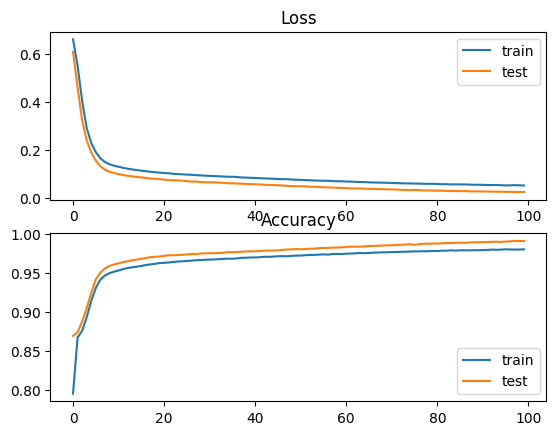

In [51]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [52]:
# predict probabilities for test set
yhat_probs = model.predict(val_LSTM_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

In [53]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
yhat_probs = (yhat_probs > 0.5).astype(int) 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(val_LSTM_y, yhat_probs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(val_LSTM_y, yhat_probs)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(val_LSTM_y, yhat_probs)
print('Recall: %f' % recall)


Accuracy: 0.991166
Precision: 0.995160
Recall: 0.987113


In [54]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [55]:
cm = confusion_matrix(y_true=val_LSTM_y, y_pred=yhat_probs)

In [56]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['Normal','Fraud']

Confusion matrix, without normalization
[[84979   409]
 [ 1098 84103]]


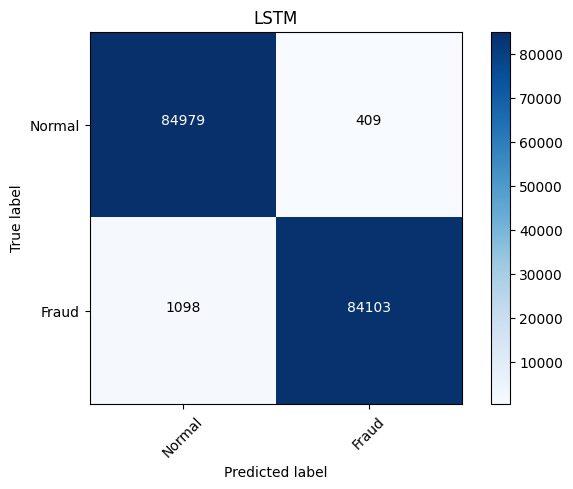

In [57]:
plot_confusion_matrix(cm=cm, classes=labels, title='LSTM')

In [77]:
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# Attention Layer definition
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1],), initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, x):
        et = tf.squeeze(tf.nn.tanh(tf.linalg.matmul(x, self.W) + self.b), axis=-1)  # Squeeze to remove last dim
        at = tf.nn.softmax(et)  # Apply softmax to get attention weights
        at = tf.expand_dims(at, axis=-1)  # Expand to match the shape of x
        return at



In [78]:
inputs1=Input((1,30))
att_in=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(inputs1)
att_in_1=LSTM(50,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(att_in)
att_out=Attention()(att_in_1)
outputs1=Dense(1,activation='sigmoid',trainable=True)(att_out)
model1=Model(inputs1,outputs1)

In [79]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

history1 = model1.fit(train_LSTM_X, train_LSTM_y, epochs=100, batch_size=64, validation_data=(val_LSTM_X, val_LSTM_y))


Epoch 1/100
6220/6220 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - accuracy: 0.5005 - loss: 0.7295 - val_accuracy: 0.5005 - val_loss: 0.6931
Epoch 2/100
6220/6220 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.4995 - val_loss: 0.6932
Epoch 3/100
6220/6220 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - accuracy: 0.5002 - loss: 0.6932 - val_accuracy: 0.5005 - val_loss: 0.6931
Epoch 4/100
6220/6220 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.5005 - val_loss: 0.6932
Epoch 5/100
  28/6220 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.4871 - loss: 0.6934 

In [ ]:
# save Attention model and architecture to single file
model1.save('Save_Model_Attention.h5')
print("Saved model to disk")

In [1]:
import pickle

# Load pickle file
with open('LSTM_model.pkl', 'rb') as file:
    loaded_object = pickle.load(file)

# Use loaded_object as needed
print(type(loaded_object))


<class 'keras.src.models.functional.Functional'>


c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# evaluate the model
_, train_acc = model1.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model1.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 50, but received input with shape (None, 1, 1)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(None, 1, 9), dtype=float32)
  • training=False
  • mask=None

In [2]:
# predict probabilities for test set
yhat_probs1 = loaded_object.predict(val_LSTM_X, verbose=0)
# reduce to 1d array
yhat_probs1 = yhat_probs1[:, 0]

NameError: name 'val_LSTM_X' is not defined

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(val_LSTM_y, yhat_probs1)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(val_LSTM_y, yhat_probs1)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(val_LSTM_y, yhat_probs1)
print('Recall: %f' % recall)


In [ ]:
cm1 = confusion_matrix(y_true=val_LSTM_y, y_pred=yhat_probs1)

In [ ]:
plot_confusion_matrix(cm=cm1, classes=labels, title='LSTM-Attention', normalize=False)

In [ ]:
import pickle
pickle.dump((model),open('LSTM_model.pkl','+wb'))